# Trained model summary

This notebook contains a summary over all trained CNNs

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

In [54]:
models = []
for folder in os.listdir(main_path):
    data = []
    name =  folder.split('_')[-1]
    data.append(name)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    data.extend(df[df['Auc']==df['Auc'].max()].values.tolist()[0])
    
    modified_time = int(os.stat(path).st_mtime)
    date = time.localtime(modified_time)[0:6]
    data.extend(date)
    models.append(data)
    
df = pd.DataFrame(models, columns=['Name', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Accuracy', 'Auc', 'Steps', 'Early_Stopped', 'Time', 'Title', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'])
df = df[['Name', 'Auc', 'Accuracy', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Steps', 'Early_Stopped', 'Time', 'Title']].sort_values(by='Auc', ascending=False)


df

,Name,Auc,Accuracy,Year,Month,Day,Hour,Minute,Second,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Steps,Early_Stopped,Time,Title
0,cccff,0.953443,90.600008,2017,6,23,13,37,18,0.001,169,5,9,32,50000,False,489.509731,Optimizing
1,ccff,0.949224,89.640009,2017,6,23,13,4,32,0.001,256,3,14,12,50000,False,1866.986505,Optimizing
5,cccf,0.944862,89.970011,2017,6,23,13,19,15,0.001,216,3,19,189,50000,False,1322.089007,Random_Plotting
4,ccf,0.937162,89.640009,2017,6,23,13,38,33,0.001,150,5,21,0,50000,False,620.128014,Random_Plotting
2,cff,0.921552,88.130009,2017,6,23,3,45,53,0.001,256,5,9,64,50000,False,1623.929747,Optimizing
3,cf,0.888994,86.710000,2017,6,23,12,53,32,0.001,215,5,25,0,50000,False,827.554981,Random_Plotting


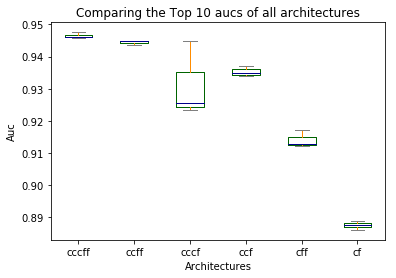

In [55]:
plot_auc = []
names = []
for folder in os.listdir(main_path):
    name =  folder.split('_')[-1]
    names.append(name)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    plot_auc.append(df[df['Title']=='Random_Plotting'].sort_values(by='Auc', ascending=False).head(3)['Auc'].values.tolist())
    
df_plot = pd.DataFrame(np.array(plot_auc).T, columns=names)
df_plot = df_plot[df_plot.max().sort_values(ascending=False).index]

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df_plot.plot.box(color=color, sym='r+')
plt.title('Comparing the Top 10 aucs of all architectures')
plt.xlabel('Architectures')
plt.ylabel('Auc')
plt.show()